In [1]:
from EncoderClassifier.datasets.pss_dataset import PSSDataset
from EncoderClassifier.utils.visualitzation import analyze_book_types, visualize_book
from EncoderClassifier.utils.data import ComicTransform
import matplotlib.pyplot as plt
import os
from transformers import SiglipImageProcessor, AutoProcessor, AutoModel
import torch
import random 
import numpy as np

/home-local/mserrao/miniconda3/envs/magi/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
root_dir = '/home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images'
annotations_dir = '/home/mserrao/PSSComics/Comics/DatasetDCM/comics_all_430.json'
precompute_dir = '/home-local/mserrao/PSSComics/multimodal-comic-pss/EncoderClassifier/data'
checkpoint_dir = '/home-local/mserrao/PSSComics/multimodal-comic-pss/EncoderClassifier/checkpoints'
data_dir = '/home-local/mserrao/PSSComics/multimodal-comic-pss/EncoderClassifier/data'
out_dir = '/home-local/mserrao/PSSComics/multimodal-comic-pss/EncoderClassifier/out'
    
model_id = 'openai/clip-vit-large-patch14-336'
gpu_id = 3
seed = 10
num_aug_copies = 5
num_synthetic_books = 1000

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

device = torch.device(f"cuda:{gpu_id}" if torch.cuda.is_available() else "cpu")

parts = model_id.split('/')[1].split('-')
backbone_name = f'{parts[0]}_{parts[-1]}'

backbone = AutoModel.from_pretrained(model_id).eval()

if 'siglip2' in backbone_name:
    processor = SiglipImageProcessor.from_pretrained(model_id)
else:
    processor = AutoProcessor.from_pretrained(model_id)
    
backbone.to(device)

if 'dinov2' in backbone_name:
    feature_dim = backbone.config.hidden_size
elif 'clip' in backbone_name:
    feature_dim = backbone.config.vision_config.projection_dim
elif 'siglip' in backbone_name:
    feature_dim = backbone.config.vision_config.hidden_size
else:
    raise ValueError(f"Warning: Unknown backbone '{backbone_name}'")

transformations = ComicTransform()

test_dataset = PSSDataset(root_dir=root_dir, 
                            model_id = model_id,
                            backbone=backbone, 
                            backbone_name = backbone_name,
                            feature_dim = feature_dim,
                            processor=processor, 
                            device=device, 
                            annotations_path=f'{data_dir}/comics_test.json', 
                            precompute_features=False,
                            precompute_dir=f'{precompute_dir}/features_test.pt', 
                            augment_data=False,
                            num_augmented_copies = num_aug_copies,
                            transform=transformations, 
                            removal_p=0.05,
                            num_synthetic_books=num_synthetic_books,
                            min_stories=2,
                            max_stories=3,
                            synthetic_remove_p=0.15)

Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/00411460/056.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/dbbf603f/024.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/dbbf603f/025.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/dbbf603f/026.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/dbbf603f/065.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/537de305/002.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/5b8add2a/012.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/077e29b1/036.jpg
Skipping unknown

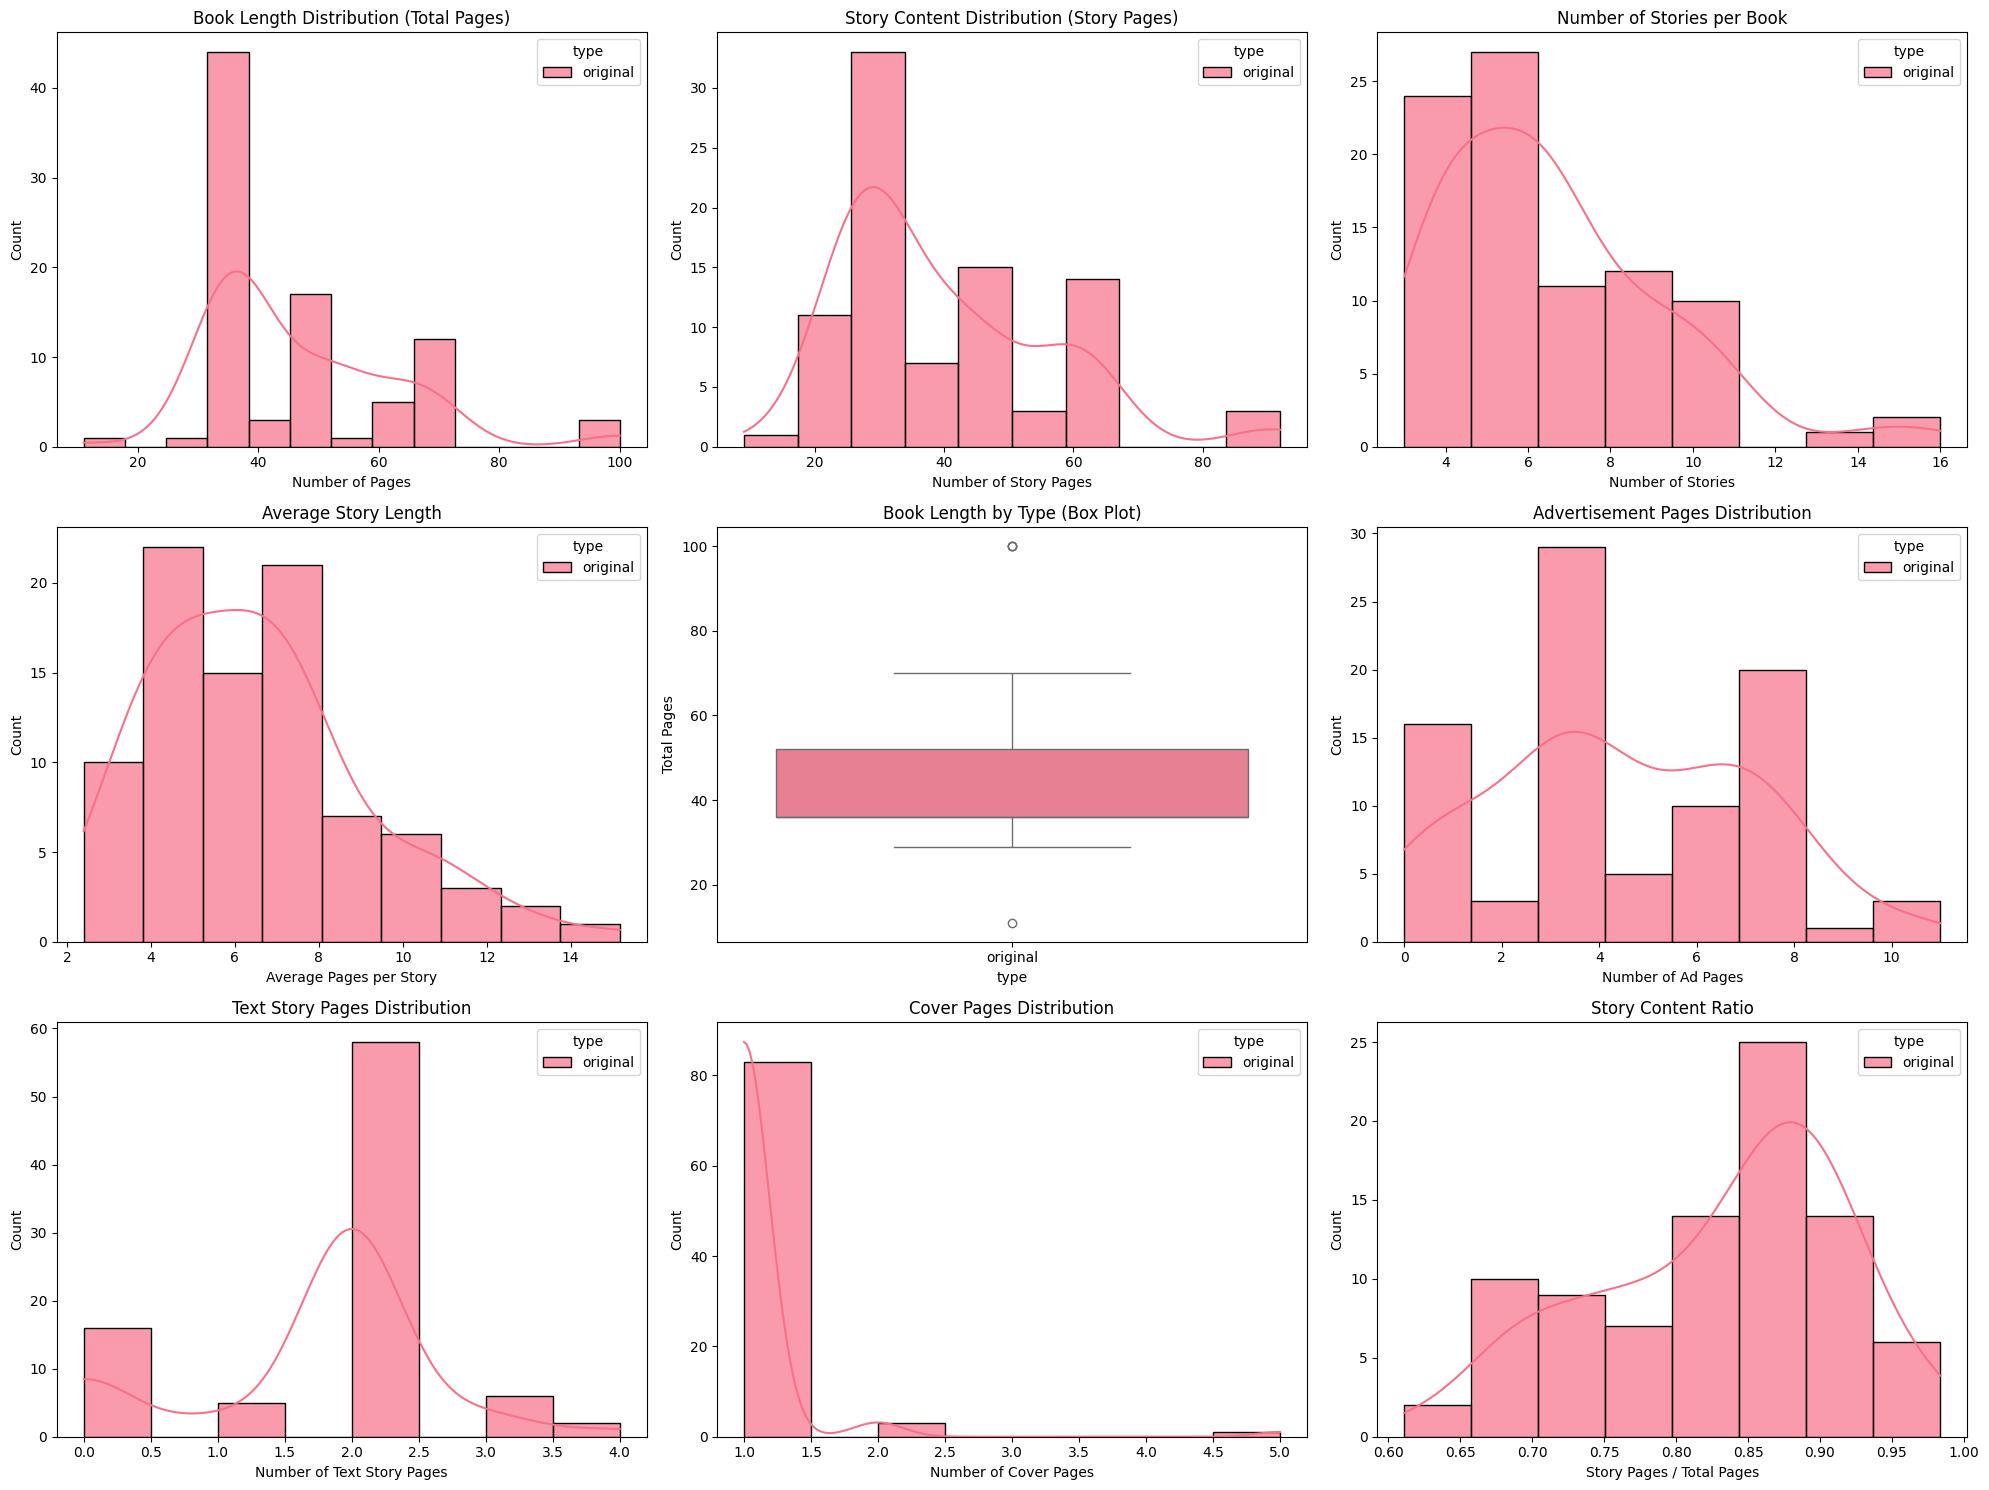

SUMMARY STATISTICS BY BOOK TYPE

ORIGINAL BOOKS (87 books):
--------------------------------------------------
total_pages         : mean=47.02, std=16.17, min=11.00, max=100.00
story_pages         : mean=39.78, std=16.44, min=9.00, max=92.00
num_stories         : mean=6.57, std=2.71, min=3.00, max=16.00
avg_story_length    : mean=6.52, std=2.59, min=2.40, max=15.17
ad_pages            : mean=4.47, std=2.69, min=0.00, max=11.00
textstory_pages     : mean=1.69, std=0.93, min=0.00, max=4.00
cover_pages         : mean=1.08, std=0.46, min=1.00, max=5.00

STATISTICAL COMPARISONS

TOTAL_PAGES:

STORY_PAGES:

NUM_STORIES:

AVG_STORY_LENGTH:

PAGE TYPE DISTRIBUTION BY BOOK TYPE
          cover_pages  story_pages  ad_pages  textstory_pages
type                                                         
original         1.08        39.78      4.47             1.69


book_id      type  total_pages  story_pages  num_stories  \
0   00411460  original           67           62           14   
1   761c7920  original           69           61            8   
2   ec5aa0b7  original           52           45            4   
3   550a141f  original           52           42            4   
4   e0c64119  original           37           25            8   
..       ...       ...          ...          ...          ...   
82  4f4adcbf  original           48           38            5   
83  6c8dba7d  original           36           34            7   
84  2421fcb1  original           36           25            6   
85  8c3039bd  original           50           40            6   
86  816b112c  original           51           43            5   

    avg_story_length  cover_pages  ad_pages  textstory_pages  first_pages  \
0           4.428571            1         2                2           14   
1           7.625000            2         4                2            8   
2          11.250000            1         4                2            4   
3          10.500000            1         7                2            4   
4           3.125000            1         8                3            8   
..               ...          ...       ...              ...          ...   
82          7.600000            1         7                2            5   
83          4.857143            1         0                1            7   
84          4.166667            1         8                2            3   
85          6.666667            1         7                2            6   
86          8.600000            1         5                2            5   

    story_ratio  
0      0.925373  
1      0.884058  
2      0.865385  
3      0.807692  
4      0.675676  
..          ...  
82     0.791667  
83     0.944444  
84     0.694444  
85     0.800000  
86     0.843137  

[87 rows x 11 columns]

In [4]:
analyze_book_types(test_dataset)

Creating visualization...


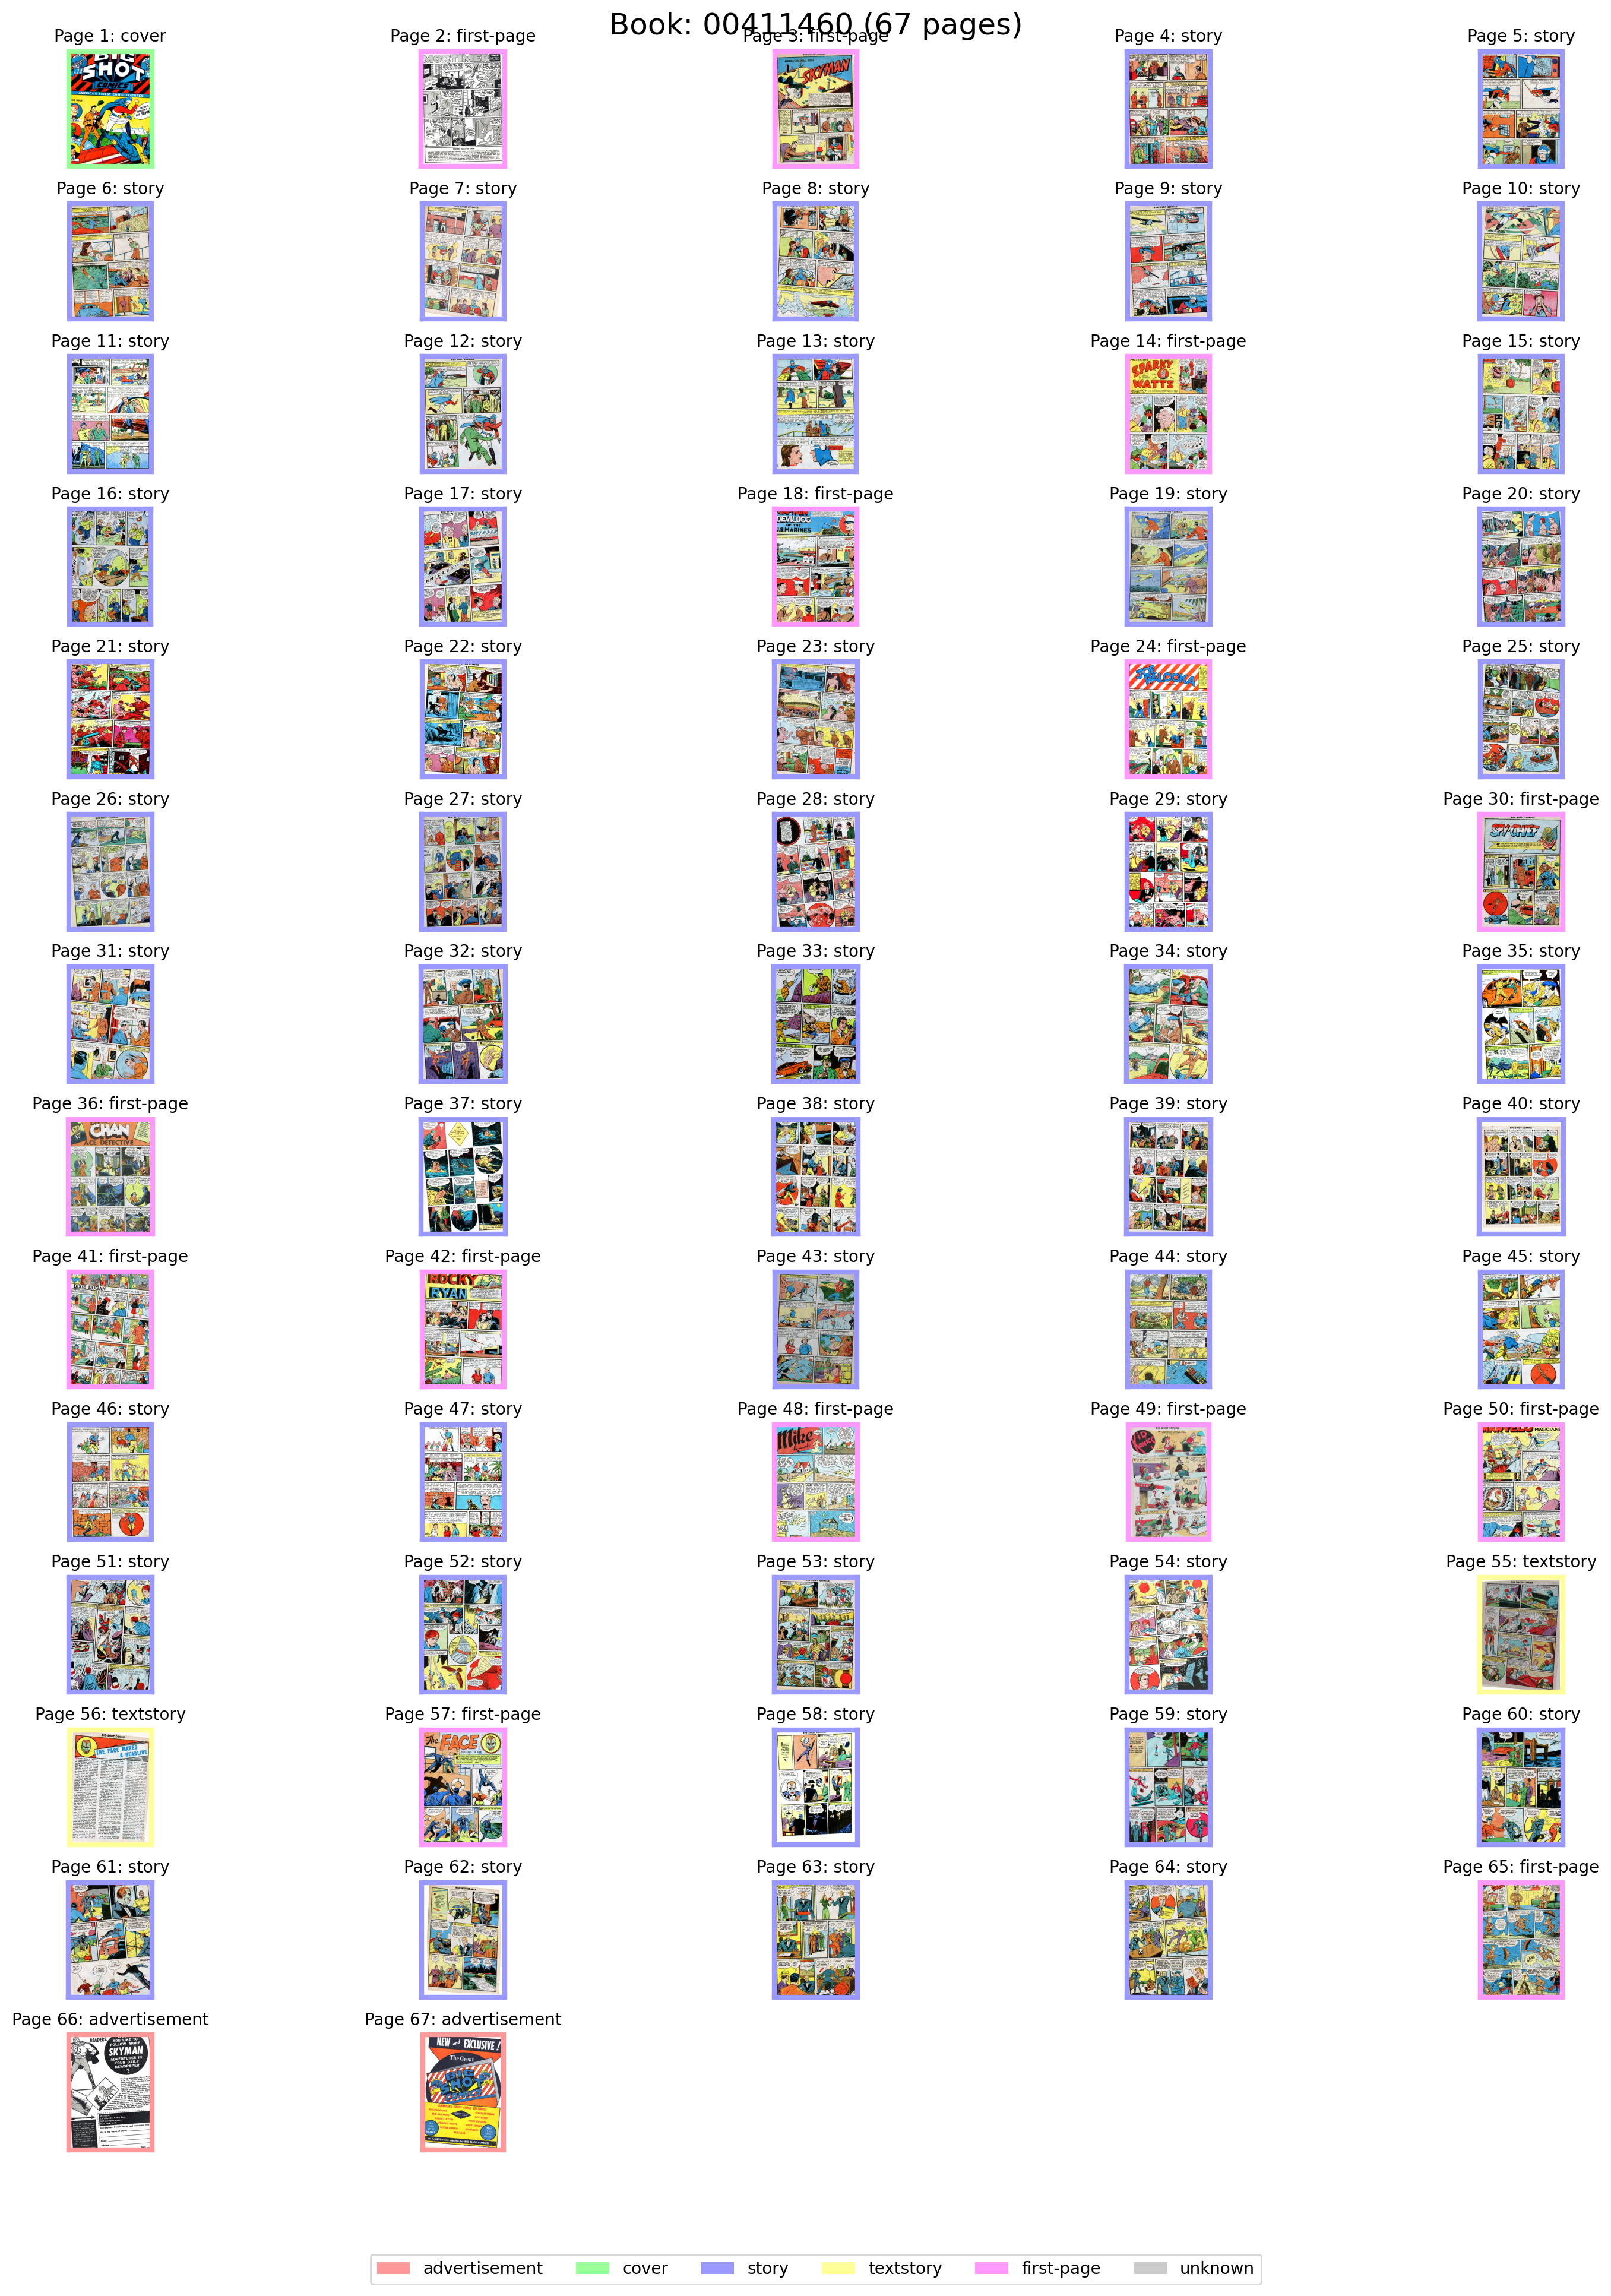

In [5]:
visualize_book(test_dataset, book_id='00411460', book_idx=None, dpi=200, transforms=transformations)
plt.show()